Navn:
Oskar Feed Jakobsen
og
xxx

## Løsning av differensialligninger

## Fjerde ordens Runge-Kutta metoden for enkel harmonisk pendel

## TFY4163 Bølgefysikk og fluidmekanikk - Prosjekt

### Innledning og teori

Bevegelsesligningen for en pendel med friksjon og drivkraft er

\begin{equation}
\nonumber
    \frac{d^2\theta}{dt^2} + \frac{g}{l}\text{sin}\theta + q\frac{d\theta}{dt} 
    = 
    \frac{F_D}{ml}\text{sin}(\omega_D t)
\end{equation}

hvor $\theta$ er pendelens utslagsvinkel, $g$ er tyngdeakselerasjonen, $l$ er lengden av snora pendelen er festet i, $q$ er en friksjonsparameter, $\frac{F_D}{ml}$ er drivkraften som pendelen utsettes
for, og $\omega_D$ er drivkraftens vinkelfrekvens. Vi definerer $\omega_0 = \sqrt{g/l}$, som er pendelens
vinkelfrekvens.
Anta at $\text{sin}\theta \approx \theta$ i alle deloppgavene (dersom ikke annet blir oppgitt), slik at bevegelesesligningen du skal løse er gitt ved

\begin{equation}
    \frac{d^2\theta}{dt^2} + \frac{g}{l}\theta + q\frac{d\theta}{dt} 
    = 
    \frac{F_D}{ml}\text{sin}(\omega_D t)
\end{equation}

Benytt parametrene under når du løser ligningen:
- Lengden av snora, $l = 1.0 \text{ m}$
- Tyngeakselerasjonen, $g = 9.8 \text{ m}/{\text{s}^2}$
- Initiell vinkel med hensyn til vertikalen, $\theta_0 = 0.2 \text{ rad}$
- Initiell vinkelhastighet, $\omega_0 = 0.0 \text{ rad}/\text{s}$
- Friksjonsparameter, $q = 1.0 \text{ s}^{−1}$
- Drivkraftens vinkelfrekvens, ${\omega_D = 3.13} \text{ s}^{−1}$
- Drivkraft, $\frac{F_D}{ml} = 0.2$ N

Når drivfrekvensen, $\omega_D$ er nær pendelens vinkelfrekvens, $\omega_0 = \sqrt{g/l}$ får vi resonans, som
vi skal undersøke i oppgavene under.



In [222]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from typing import Callable
%matplotlib inline

l: float = 1.0              # Lengden av snora, [m]
g: float = 9.8              # Tyngdeakselerasjonen, [m s^-2]
theta_0: float = 0.2        # initiell vinkel med hensyn på vertikalen, [rad]
omega_0: float = 0.0        # initiell vinkelhastighet, [rad s^-1]
q: float = 1.0              # friksjonsparameter, [s^-1]
# q: float = 2*np.sqrt(g/l)              # friksjonsparameter, [s^-1]      for kritisk
# q: float =8              # friksjonsparameter, [s^-1]      for overkritisk kritisk
omega_D: float = 3.13       # Drivkraftens vinkelfrekvens, [s^-1]
F_D: float = 0.2            # Drivkraft (F_D/{ml}), [N]

In [223]:
def plot(x_array: list,
        y_array: list,
        labels: list = None,
        xlabels: list = None,
        ylabels: list = None,
        titles: list = None
        ) -> None:
    """
    Function for plotting several functions horizontally in same figure
    
    Parameters:
    ----------
    x_array:
    y_array:
    labels:
    x_label:
    y_label:
    title:
    
    Returns:
    ---------
    None
    """
    fig, axs = plt.subplots(1, len(y_array))
    fig.set_size_inches(8,8)
    if np.shape(axs) == ():
        axs = (axs,)    

    for i in range(len(y_array)):
        try:
            axs[i].plot(x_array[i], y_array[i], label=labels[i])
            axs[i].set_xlabel(xlabels[i])
            axs[i].set_ylabel(ylabels[i])
            axs[i].set_title(titles[i])
            plt.legend()
        except:
            axs[i].plot(x_array[i], y_array[i])
        axs[i].grid()
    plt.show()

### Oppgave 1
Bruk fjerdeordens Runge-Kutta metoden for å løse bevegelsesligningen. Plot vinkelutslaget som funksjon av tid, opp til $t = 20$ s. Bruk tidssteg $\Delta t = 0.01$ s.

In [224]:

def equation(t: float, vals: list):
    """
    Calculates the value of RHS of the differential equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float. time
    vals: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """

    theta = vals[0]
    omega = vals[1]
    
    dtheta = omega
    domega = -g/l*theta - q*omega + F_D*np.sin(omega_D*t)
    return [dtheta, domega]

In [225]:
def RK45_method(RHS: Callable, theta_0: float, omega_0: float, T: float, dt: float):
    """
    Calculates theta and omega using the scipy.integrate.solve_ivp function (RK54)
    
    Parameters
    -----------
    RHS: Callable. Right hand side of differential equations
    theta_0: float. Initial value for theta
    omega_0: float. Initial value for omega
    T: float. time-value to calculate up to (e.g. 10 seconds)
    dt: float. timestep
    
    Returns
    -------
    theta: array. Theta values
    omega: array. Omega values
    t: array. Time values
    """
    time_span = [0, T]
    N = int(T/dt)
    t_vals = np.linspace(0, T, N)
    solution = integrate.solve_ivp(RHS, 
                                   t_span=time_span, 
                                   y0=[theta_0, omega_0], 
                                   method='RK45', 
                                   t_eval=t_vals
                                   ) 

    theta = solution.y[0]
    omega = solution.y[1]
    t = solution.t
    return theta, omega, t

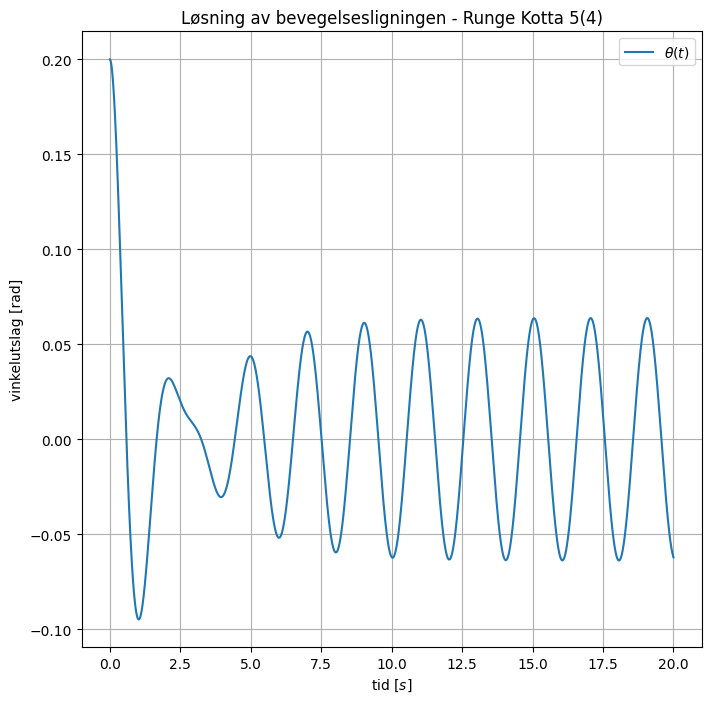

In [226]:
# LØSE LIGNING
dt = 0.01
T = 20
theta, omega, t = RK45_method(RHS=equation, theta_0=theta_0, omega_0=omega_0, T=T, dt=dt)

plot(
    x_array=[t],
    y_array=[theta], 
    labels=[r"$\theta(t)$"], 
    xlabels=[r"tid [$s$]"], 
    ylabels=["vinkelutslag [rad]"], 
    titles=["Løsning av bevegelsesligningen - Runge Kotta 5(4)"]
    )

### Oppgave 2
Finn en passende steglengde, $\Delta t$, ved å utføre konvergenstest av løsningen, ved fjerde
ordens Runge-Kutta metoden. Utfør også testen for Euler-Cromer metoden (som du
må implementere i koden din). Plot de to konvergenstestene i hver sin figur. Vurder
ut fra konvergenstesten om tidssteget brukt i oppgave 1 var tilstrekkelig.


In [227]:
def euler_cromer(theta_0, omega_0, T, dt):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(T/dt)
    t = np.linspace(0, T, N)
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = theta_0
    omega[0] = omega_0
    for i in range(len(t)-1):
        omega[i+1] = omega[i] + (-g/l*theta[i] - q*omega[i] + F_D*np.sin(omega_D*t[i])) * dt
        theta[i+1] = theta[i] + omega[i+1]*dt
    return theta, omega, t


In [228]:
def energy(omega_array: np.ndarray, theta_array: np.ndarray) -> tuple:
    """
    Calculates energy density (energy per mass) for all omega, theta states. small angle approx.

    Parameters:
    -----
    omega_array: np.ndarray.
    theta_array: np.ndarray.  

    Returns:
    -----
    E_k: np.ndarray. kinetic energy
    E_p: np.ndarray. potensial energy
    E: np.ndarray. total energy
    """
    E_k = 0.5*l**2*omega_array**2
    E_p = 0.5*g*l*theta_array**2
    E = E_k + E_p
    return E_k, E_p, E


In [229]:
def convergence_test(method: Callable, theta_0, omega_0, T, dt_array: np.ndarray):
    """
    Runs a convergence test for a method over an array of dt with initial values.
    
    Parameters
    -----------    
    method:
    theta_0:
    omega_0:
    T:
    dt_array:
    
    Returns
    -----------
    Delta_theta: absolute value of theta difference for dt 
    """
    Delta_E = np.zeros_like(dt_array) 
    for i in range(len(Delta_E)):
        if method.__name__ == "RK45_method":
            theta, omega, t = method(equation, theta_0, omega_0, T, dt_array[i])
            _, _, E = energy(omega_array=omega, theta_array=theta)
            # Delta_E[i] = abs(E[-1]-E[0])
            Delta_E[i] = abs(E[-1])
        elif method.__name__ == "euler_cromer":
            theta, omega, t = method(theta_0, omega_0, T, dt)
            _, _, E = energy(omega_array=omega, theta_array=theta)
            # Delta_E[i] = abs(E[-1] - E[0]) 
            Delta_E[i] = abs(E[-1]) 
        else:
            raise(NotImplementedError)
    return Delta_E

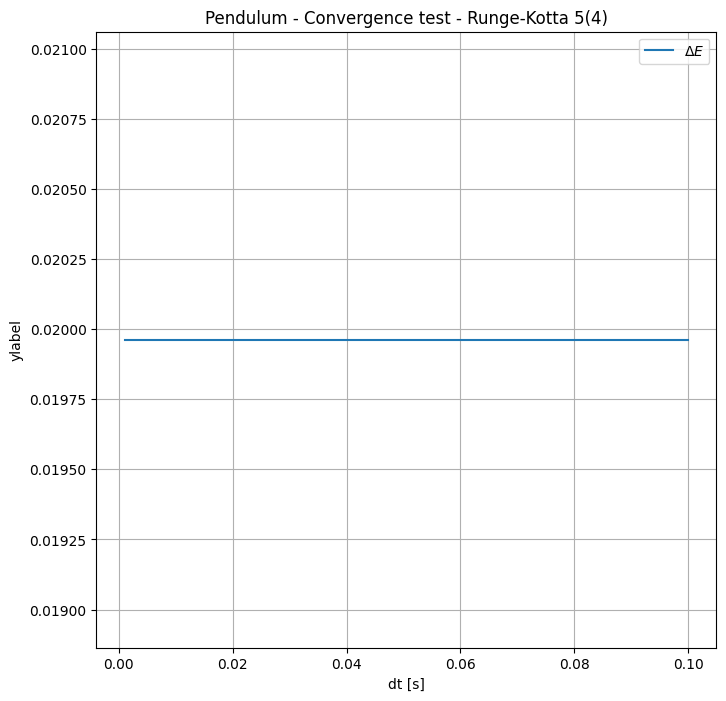

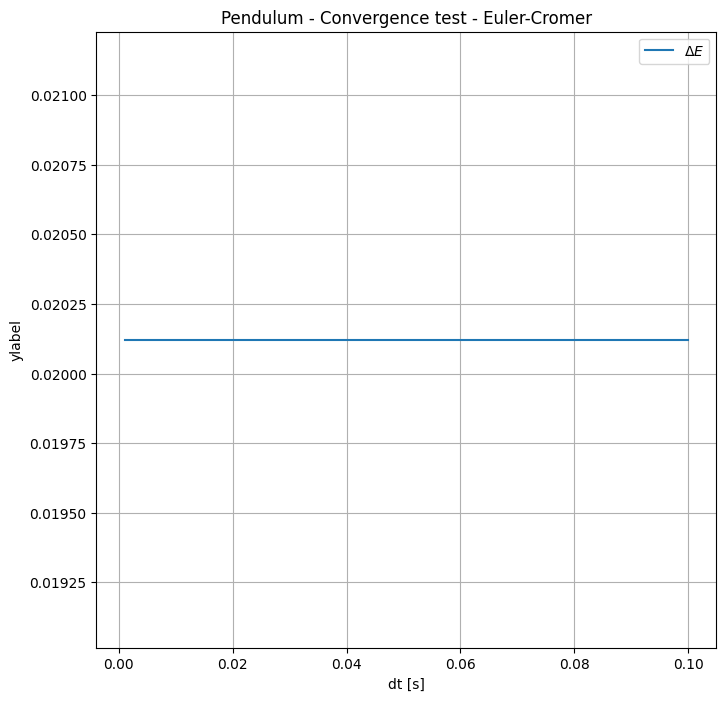

In [230]:
# Initialising array of dt values for the convergence test
dt_start = 1e-3
dt_step = 1e-3
dt_end = 1e-1
dt_array = np.arange(dt_start, dt_end+dt_step, dt_step)

dE_RK45 = convergence_test(RK45_method, theta_0=theta_0, omega_0=omega_0, T=T, dt_array=dt_array)

plot(
     x_array=[dt_array],
     y_array=[dE_RK45],
     labels=[r"$\Delta E$"],
     xlabels=["dt [s]"],
     ylabels=[r"ylabel"],
     titles=["Pendulum - Convergence test - Runge-Kotta 5(4)"]
     )

dE_Euler_Cromer = convergence_test(euler_cromer, theta_0=theta_0, omega_0=omega_0, T=T, dt_array=dt_array)
plot(
     x_array=[dt_array],
     y_array=[dE_Euler_Cromer],
     labels=[r"$\Delta E$"],
     xlabels=["dt [s]"],
     ylabels=[r"ylabel"],
     titles=["Pendulum - Convergence test - Euler-Cromer"]
     )

### Oppgave 3
Undersøk hvordan resonantamplituden avhenger av drivfrekvensen $\Omega_D$. Plot vinkelutslaget for minst fem ulike verdier av $\Omega_D$, som du mener viser denne sammenhengen.

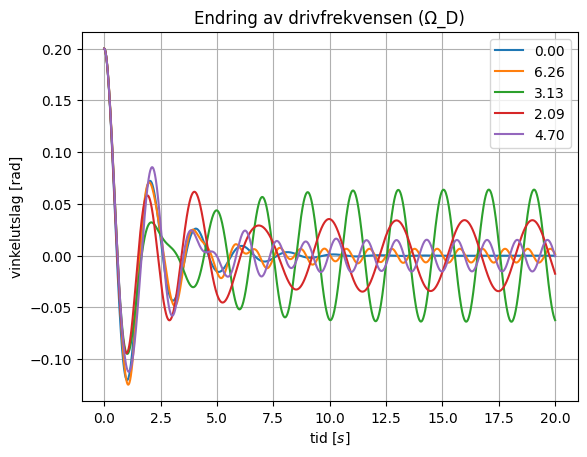

In [231]:
# løs
omega_d_liste = [0,2*np.sqrt(g/l), np.sqrt(g/l),(2/3)*np.sqrt(g/l),(3/2)*np.sqrt(g/l)]  # list with omega_d values 
plt.figure()

k = 0
for k,i in enumerate(omega_d_liste): 
    omega_D = i           
    theta, omega, t = RK45_method(RHS=equation, theta_0=theta_0, omega_0=omega_0, T=T, dt=dt)

    if k <= 3:
        plt.plot(t,theta,label = f'{omega_D:.2f}')
    else:
        plt.plot(t,theta,label = f'{omega_D:.2f}')
    
    #x_array=[t],
    #y_array=[theta], 
plt.xlabel(r"tid [$s$]") 
plt.ylabel("vinkelutslag [rad]")
plt.title("Endring av drivfrekvensen (\u03A9_D)")
plt.grid()
plt.legend()
plt.show()

### Oppgave 4
Undersøk hvordan resonantamplituden avhenger av friksjonsparameteren, $q$. Plot
vinkelutslaget for minst fem ulike verdier av $q$, som du mener viser denne sammenhengen.


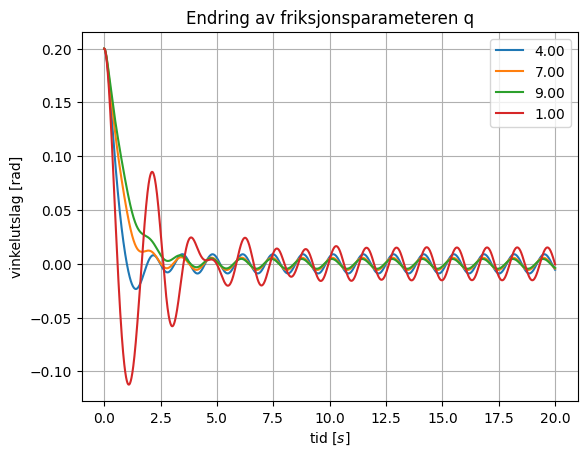

In [232]:
# løs

q_verdier = [4,7,9,1]
plt.figure()

for i in q_verdier:
    q = i

    theta, omega, t = RK45_method(RHS=equation, theta_0=theta_0, omega_0=omega_0, T=T, dt=dt)
    
    
    #x_array=[t],
    #y_array=[theta], 
    plt.plot(t, theta ,label = f'{q:.2f}')
plt.xlabel(r"tid [$s$]") 
plt.ylabel("vinkelutslag [rad]")
plt.title("Endring av friksjonsparameteren q")
plt.grid()
plt.legend()
plt.show()


### Oppgave 5
For en dempet pendel uten drivkraft (sett $F_D = 0$) skiller vi mellom overkritisk,
underkritisk og kritisk dempning. Plot vinkelutslaget opp til $t = 4$ s, og bestem for
hvilke $q$ vi finner disser regimene.

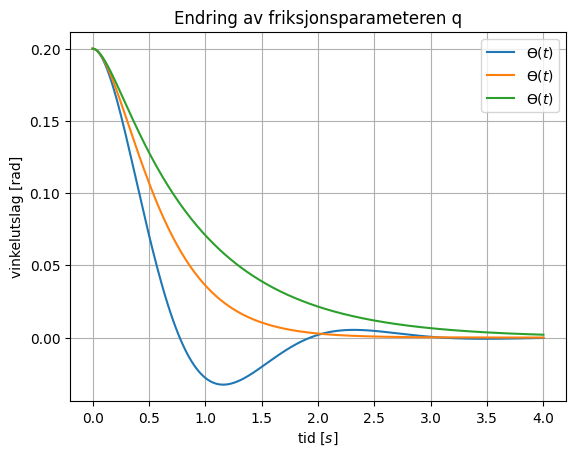

In [233]:
#løs
F_D = 0
tid = 4 
plt.figure()

q_kritisk = 2 * np.sqrt(g/l)
q_verdier2 = [0.5 * q_kritisk, q_kritisk, 1.5 * q_kritisk]

theta_v = 0 
for i in range(len(theta)):
    theta_v += theta[i]       # Finner gjennomsnittet av alle theta-verdier 

averg = theta_v / len(theta)  # likevektsposisjonen til funksjonen er gjennomsnittsverdien

x_line = (0,4)
y_line = (averg,averg)

for i in q_verdier2:
    q = i
    
    theta, omega, t = RK45_method(RHS=equation, theta_0=theta_0, omega_0=omega_0, T=tid, dt=dt)
    plt.plot(t, theta ,label = ("$\u03F4(t)$"))
    

plt.xlabel(r"tid [$s$]") 
plt.ylabel("vinkelutslag [rad]")
plt.title("Endring av friksjonsparameteren q")
plt.grid()
plt.legend()
plt.show()
F_D = 0.2
q = 1


### Oppgave 6
Ekstra oppgave:

a) Gå nå bort fra antakelsen at $\text{sin}\theta \approx \theta$. Plot vinkelutslaget som funksjon av tid, i
samme plot som vinkelutslaget for liten-vinkel tilærmelsen for $\theta_0 = 60^\circ$ og $\omega_0 = 0.0$.
Bruk tiddssteg $\Delta t = 0.01$, og samme parametre som i oppgave 1. Tips: Konverter
fra grader til radianer med `np.radians`.

b) Prøv deg frem med initialverdiene og parametrene, og finn når kaotisk oppførsel
begynner å oppstå. Plot vinkelutslaget som funksjon av tid for slik kaotisk oppførsel.


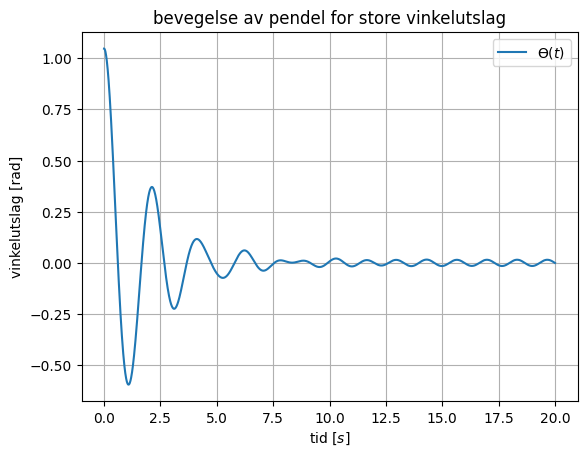

In [234]:
# løs
# a 

omega_0 = 0
theta_0 = np.radians(60)



def equation_2(t: float, vals: list):     # samme som funksjonen "Equation" bare at sin (theta) er tilnærmet theta
    """
    Calculates the value of RHS of the differential equations given an array (vals) which 
    contains the values of the parameters    

    Parameters
    -----------
    t: float. time
    vals: array. values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """

    theta = vals[0]
    omega = vals[1]
    
    dtheta = omega
    domega = -g/l*np.sin(theta) - q*omega + F_D*np.sin(omega_D*t)
    return [dtheta, domega]

theta, omega, t = RK45_method(RHS=equation_2, theta_0=theta_0, omega_0=omega_0, T=T, dt=dt)

plt.plot(t, theta ,label = ("$\u03F4(t)$"))
plt.xlabel(r"tid [$s$]") 
plt.ylabel("vinkelutslag [rad]")
plt.title(r"bevegelse av pendel for store vinkelutslag")
plt.grid()
plt.legend()
plt.show()

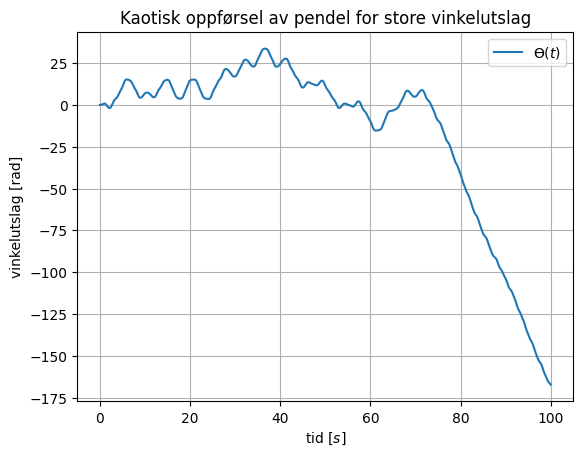

In [235]:
# b 
T: float = 100
l: float = 1.0              # Lengden av snora, [m]
g: float = 9.8             # Tyngdeakselerasjonen, [m s^-2]
theta_0: float = 0      # initiell vinkel med hensyn på vertikalen, [rad]
omega_0: float = 0  # initiell vinkelhastighet, [rad s^-1]
q: float = 0            # friksjonsparameter, [s^-1]
# q: float = 2*np.sqrt(g/l)              # friksjonsparameter, [s^-1]      for kritisk
# q: float =8              # friksjonsparameter, [s^-1]      for overkritisk kritisk
omega_D: float = np.sqrt(g/l)     # Drivkraftens vinkelfrekvens, [s^-1]
F_D: float = 5

theta, omega, t = RK45_method(RHS=equation_2, theta_0=theta_0, omega_0=omega_0, T=T, dt=dt)

plt.plot(t, theta ,label = ("$\u03F4(t)$"))
plt.xlabel(r"tid [$s$]") 
plt.ylabel("vinkelutslag [rad]")
plt.title(r"Kaotisk oppførsel av pendel for store vinkelutslag")
plt.grid()
plt.legend()
plt.show()

### Krav til godkjenning
Kravene under må være oppfylt for å få godkjent prosjektet.
1. Besvarelsen skal leveres i Jupyter Notebook.
2. Figurene fra alle oppgavene skal være i notebooken du leverer.
3. Alle figurer skal ha tittel på aksene, tittel på figuren, og legend (legend kreves kun
dersom det er mer enn ett plot).
